<a href="https://colab.research.google.com/github/paulajbawuah/SupervisedMLProject/blob/main/48_Grade_Notebook2(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Computer Vision**

## **Problem Statement: Automated Diagnosis of Diabetic Retinopathy**

### **Background**
Diabetic Retinopathy (DR) is a serious complication of diabetes that damages the retina, potentially leading to vision loss. With the rising prevalence of diabetes, DR has become a significant public health concern. Early detection and timely intervention are vital for preventing severe vision impairment and improving patient outcomes. However, the current methods of diagnosing DR through manual interpretation of retinal images are labor-intensive and prone to human error, making them inefficient and inconsistent.

### **Objective**
The goal is to develop an automated and accurate tool for diagnosing Diabetic Retinopathy using retinal images. This tool should assist healthcare professionals by providing consistent and reliable grading of DR severity, thus facilitating early intervention and personalized treatment plans.

### Dataset Description
The dataset comprises a large collection of high-resolution retinal images captured under various imaging conditions. Each image has been assessed by a medical professional, who determined the presence of Diabetic Retinopathy and assigned a binary rating:
- 0: Diabetic Retinopathy
- 1: No Diabetic Retinopathy

### **Challenges**
1. **Subjectivity and Manual Labor:** Current methods rely on subjective assessments, which can lead to inconsistencies and inefficiencies.
2. **Increasing Prevalence:** The rising number of diabetes cases and the limited availability of ophthalmologists exacerbate the need for timely and accurate screening.
3. **Imaging Variability:** The dataset includes images captured under different conditions, which may affect the consistency of the automated diagnosis.

### **Solution**
To address these challenges, an automated system utilizing advanced machine learning techniques will be developed. This system aims to:
- Accurately detect and grade Diabetic Retinopathy from retinal images.
- Provide consistent and reliable results, reducing the dependence on subjective human interpretation.
- Enable early detection and intervention, improving patient outcomes.

### **Impact**
Implementing an automated DR diagnosis system will streamline the screening process, reduce the workload on healthcare professionals, and ensure timely and accurate diagnosis. This will ultimately lead to better management of Diabetic Retinopathy and improved vision health for patients with diabetes.

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from pathlib import Path
import random

In [3]:
# Set seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
data_root_path = '/content/drive/MyDrive/train'
total_classes = os.listdir(data_root_path)
print(total_classes)

['No_DR', 'DR']


In [12]:
# Load images and labels
def load_data(data_path):
    images = []
    labels = []
    for label, category in enumerate(total_classes):
        category_path = Path(data_path) / category
        for image_path in category_path.glob('*.jpg'):
            img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)


In [13]:
X, y = load_data(data_root_path)
print(f'Total images: {len(X)}, Total labels: {len(y)}')

Total images: 2076, Total labels: 2076


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [25]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

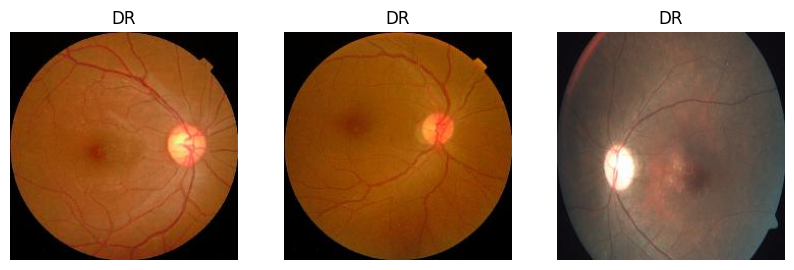

In [16]:
# Identify the class label for DR
DR_label = 0

# Filter images belonging to the DR class
DR_indices = np.where(y_train == DR_label)[0]

plt.figure(figsize=(10, 10))
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(X_train[DR_indices[i]])
  plt.title("DR")
  plt.axis("off")

plt.show()


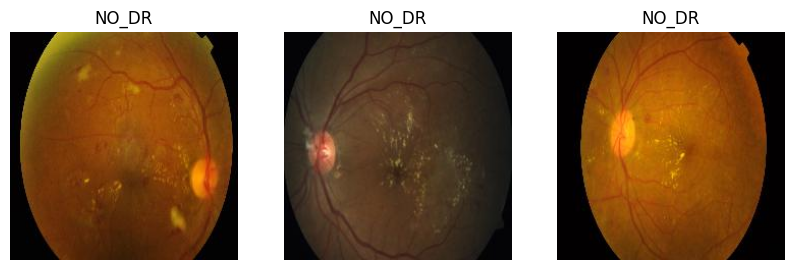

In [17]:
# Identify the class label for NO_DR
NO_DR_label = 1

# Filter images belonging to the NO_DR class
NO_DR_indices = np.where(y_train == NO_DR_label)[0]


plt.figure(figsize=(10, 10))
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(X_train[NO_DR_indices[i]])
  plt.title("NO_DR")
  plt.axis("off")
plt.show()


In [18]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [27]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
52/52 [==============================] - 253s 5s/step - loss: 0.3320 - accuracy: 0.8416 - val_loss: 0.2692 - val_accuracy: 0.9111
Epoch 2/10
52/52 [==============================] - 254s 5s/step - loss: 0.2040 - accuracy: 0.9157 - val_loss: 0.2507 - val_accuracy: 0.9207
Epoch 3/10
52/52 [==============================] - 250s 5s/step - loss: 0.2017 - accuracy: 0.9217 - val_loss: 0.2545 - val_accuracy: 0.9207
Epoch 4/10
52/52 [==============================] - 255s 5s/step - loss: 0.1842 - accuracy: 0.9331 - val_loss: 0.2504 - val_accuracy: 0.9207
Epoch 5/10
52/52 [==============================] - 242s 5s/step - loss: 0.1694 - accuracy: 0.9416 - val_loss: 0.2961 - val_accuracy: 0.9038
Epoch 6/10
52/52 [==============================] - 243s 5s/step - loss: 0.1650 - accuracy: 0.9422 - val_loss: 0.2646 - val_accuracy: 0.9183
Epoch 7/10
52/52 [==============================] - 238s 5s/step - loss: 0.1584 - accuracy: 0.9482 - val_loss: 0.2484 - val_accuracy: 0.9255
Epoch 8/10
52

In [29]:
test_loss, test_acc = model.evaluate(train_ds)
print(f"Test Accuracy: {test_acc}")

52/52 [==============================] - 57s 1s/step - loss: 0.1091 - accuracy: 0.9639
Test Accuracy: 0.9638554453849792


In [32]:
val_accuracy = history.history['val_accuracy']

In [33]:
print(val_accuracy)

[0.911057710647583, 0.9206730723381042, 0.9206730723381042, 0.9206730723381042, 0.9038461446762085, 0.9182692170143127, 0.9254807829856873, 0.911057710647583, 0.9206730723381042, 0.9230769276618958]


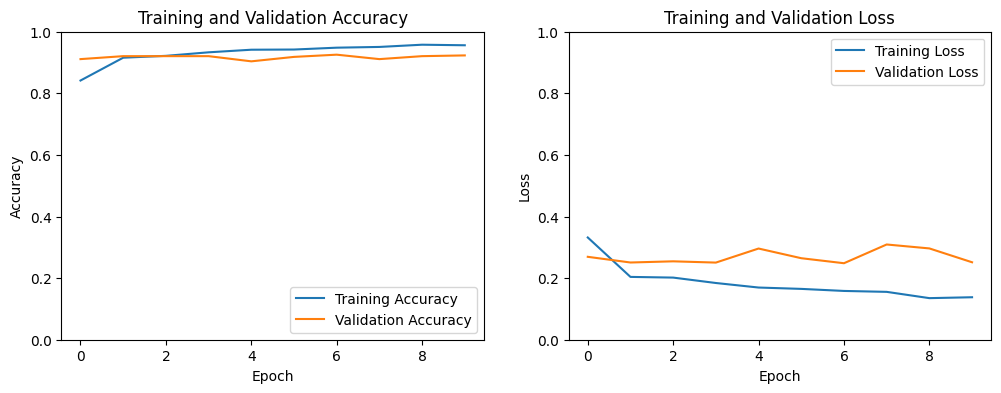

In [30]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [31]:
model.save('diabetic_retinopathy_cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
